# EDA

# Bike Details Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/content/drive/MyDrive/PW_skills_Assignment/BIKE DETAILS.csv")
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1056,False
1057,False
1058,False
1059,False


In [ ]:
df.km_driven.unique()

array([   350,   5650,  12000,  23000,  21000,  60000,  17000,  39000,
        32000,  42000,  10000,  21178,   1127,   1700,  55000,  27000,
        45000,  17450,  20696,   2000,  20000,  35000,  15210,  24000,
         2500,  75000,  50000,   6502,  16000,  13000,  12800,   4600,
        81000,   8000,  57000,  26000,  29000,  43000,  40000,   3000,
        80000,  30000,  41000,   8150,   1933,  55750,  15856,   3700,
        21938,  48000,  54000,  15000,   3500,   9000,  38000,  22000,
         9432,  70000, 500000,  30514, 130000,  25000,  22770,   6330,
          500,  43400,   7004,  16500,  12500,   9600,  11000,   7500,
       120000,   6465,  18803,   7000,   6100,  14000,  85000,  18000,
         1500,  90000,  36500,  49000,   8500,   3775,  14500,   4000,
        99000,  52000,   2300,  36000,  71000,  15888,   5600,  19612,
        33700, 100000,   6000,  46000,  72000,  67000,  15500,  60855,
        37714,  34601,  44000,  17500,   6500,   2200,  66191,  32800,
      

In [ ]:
#1 What is the range of selling prices in the dataset?
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"Range of selling prices: {price_range}")

Range of selling prices: 755000


In [ ]:
#2. What is the median selling price for bikes in the dataset?
median_selling_price = df["selling_price"].median()
print(f"The median selling price is: {median_selling_price}")

The median selling price is: 45000.0


In [ ]:
#3. What is the most common seller type?
common_seller_type = df["seller_type"].mode()
print(f"Most Common Seller Type is: {common_seller_type}")

Most Common Seller Type is: 0    Individual
Name: seller_type, dtype: object


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
count = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes driven more than 50,000 km: {count}")

Bikes driven more than 50,000 km: 170


In [ ]:
#5. What is the average km_driven value for each ownership type?
average_km_by_ownership = df.groupby('owner')['km_driven'].mean()
print(average_km_by_ownership)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?
proportion = (df[df['year'] <= 2015].shape[0]) / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {proportion:.2f}")

Proportion of bikes from 2015 or older: 0.57


In [ ]:
#7. What is the trend of missing values across the dataset?
missing_summary = df.isnull().sum().to_frame(name='Missing Values')
missing_summary['% Missing'] = (missing_summary['Missing Values'] / len(df)) * 100
print(missing_summary)

                   Missing Values  % Missing
name                            0   0.000000
selling_price                   0   0.000000
year                            0   0.000000
seller_type                     0   0.000000
owner                           0   0.000000
km_driven                       0   0.000000
ex_showroom_price             435  40.999057


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
max_price_row = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
print(max_price_row[['name', 'ex_showroom_price']])

                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [ ]:
#9. What is the total number of bikes listed by each seller type?
seller_counts = df['seller_type'].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Correlation between selling_price and km_driven: -0.24


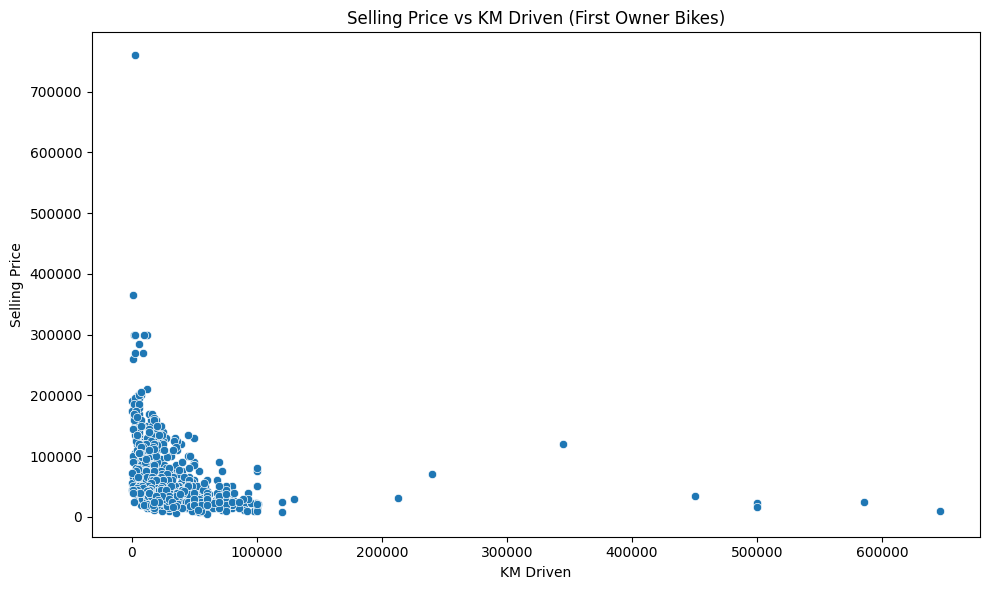

In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

import matplotlib.pyplot as plt
import seaborn as sns
first_owner_bikes = df[df['owner'] == '1st owner']

correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation between selling_price and km_driven: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs KM Driven (First Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Removed {df.shape[0] - df_no_outliers.shape[0]} outliers from 'km_driven'")

Removed 39 outliers from 'km_driven'


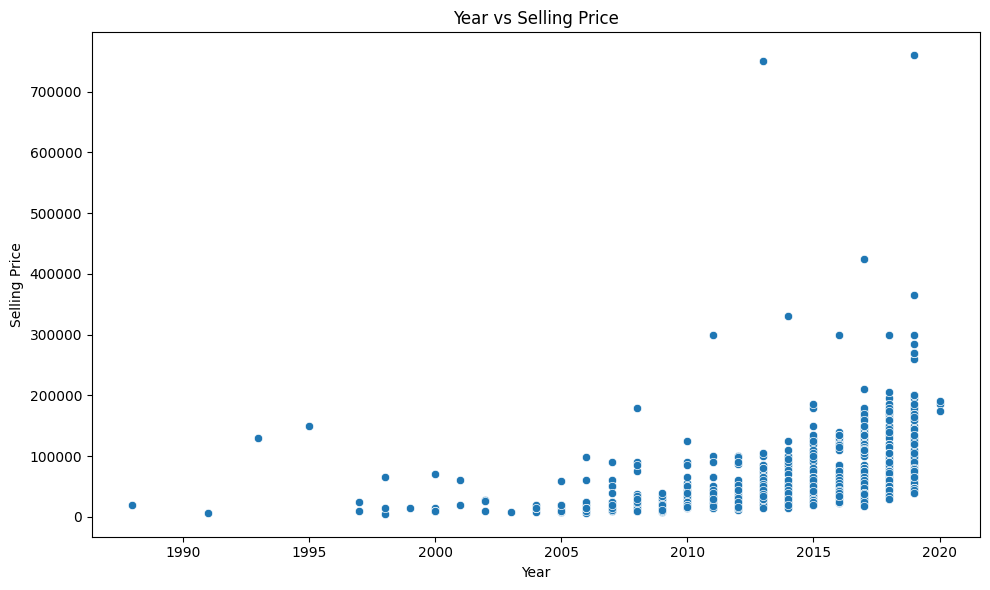

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


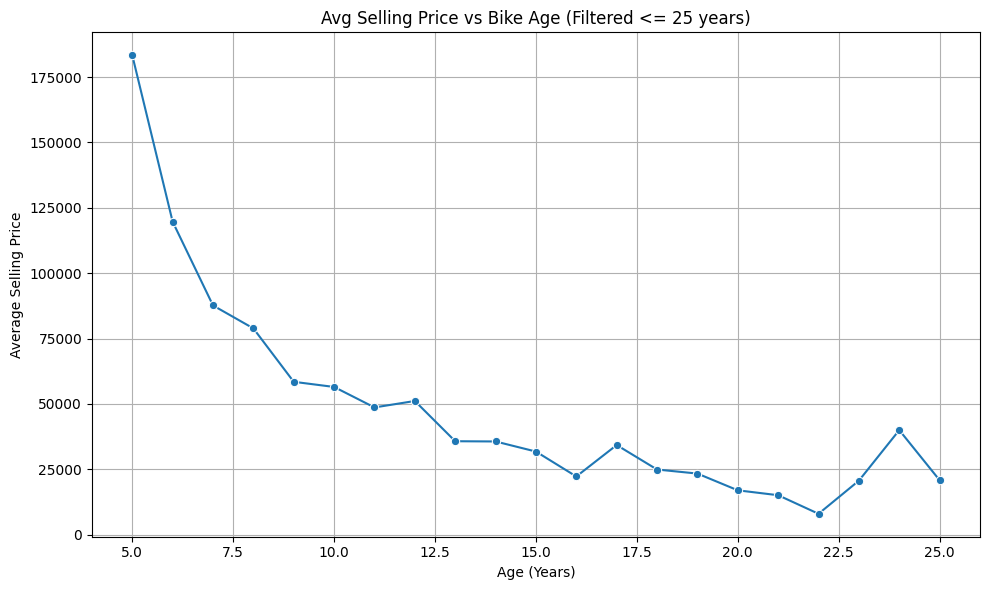

In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025
df['age'] = current_year - df['year']

avg_price_by_age = df.groupby('age')['selling_price'].mean()

print(avg_price_by_age)

avg_price_by_age_filtered = df[df['age'] <= 25].groupby('age')['selling_price'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_age_filtered.index, y=avg_price_by_age_filtered.values, marker='o')
plt.title('Avg Selling Price vs Bike Age (Filtered <= 25 years)')
plt.xlabel('Age (Years)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

year_avg_price = df.groupby('year')['selling_price'].mean().to_dict()

df['year_avg_price'] = df['year'].map(year_avg_price)
df['above_avg'] = df['selling_price'] > 1.5 * df['year_avg_price']

expensive_bikes = df[df['above_avg'] == True]

result = expensive_bikes[['name', 'year', 'selling_price', 'year_avg_price']]
result['price_diff'] = result['selling_price'] - result['year_avg_price']

print(result.head(10))


                                    name  year  selling_price  year_avg_price  \
2    Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046   
7   Royal Enfield Bullet 350 [2007-2011]  2008         180000    34289.285714   
13                         Yamaha YZF R3  2019         365000   119689.511628   
18   Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046   
23                         Jawa Standard  2019         180000   119689.511628   
24         Royal Enfield Thunderbird 350  2016         110000    58469.018692   
37                        Honda CBR-250R  2016         120000    58469.018692   
39         Royal Enfield Thunderbird 350  2015          90000    56500.000000   
40                     Bajaj Dominar 400  2017         125000    78894.736842   
42                          KTM 390 Duke  2017         175000    78894.736842   

       price_diff  
2    62339.625954  
7   145710.714286  
13  245310.488372  
18   62339.625954  
23   603

/tmp/ipython-input-2302717516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['price_diff'] = result['selling_price'] - result['year_avg_price']


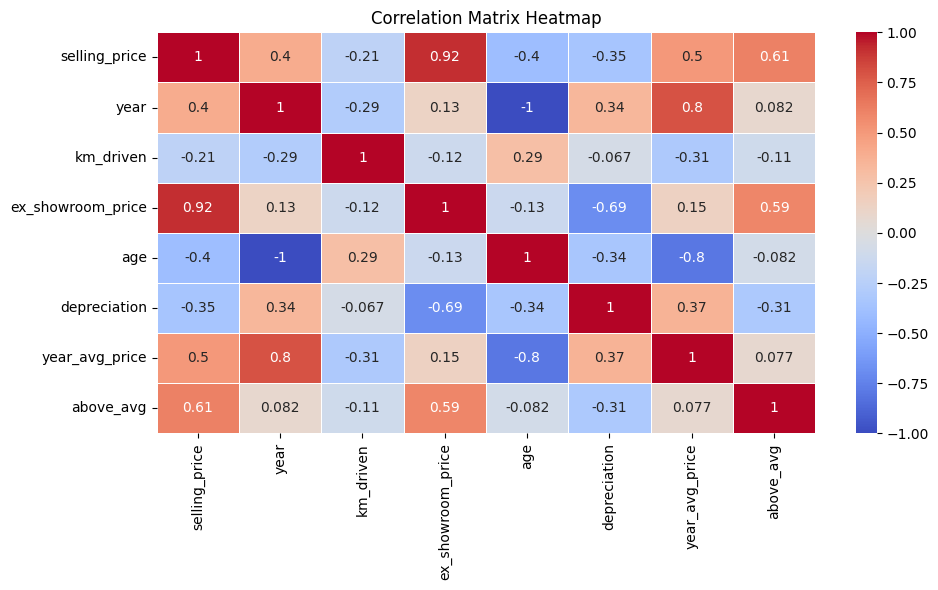

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Bike Sales Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
car_df = pd.read_csv("/content/drive/MyDrive/PW_skills_Assignment/Car Sale.csv")
car_df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
car_df.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [ ]:
car_df.shape

(23906, 16)

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
car_df["Dealer_No "].unique()

array(['06457-3834', '60504-7114', '38701-8047', '99301-3882',
       '53546-9427', '85257-3102', '78758-7841'], dtype=object)

In [ ]:
car_df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
car_df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
car_df = car_df.dropna(subset=['Customer Name'])

In [ ]:
car_df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_per_dealer = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print(avg_price_per_dealer)


Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Capitol KIA                                        28189.703822
Saab-Belle Dodge                                   28176.692000
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
brand_variation = car_df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

print(brand_variation.head(5))

Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


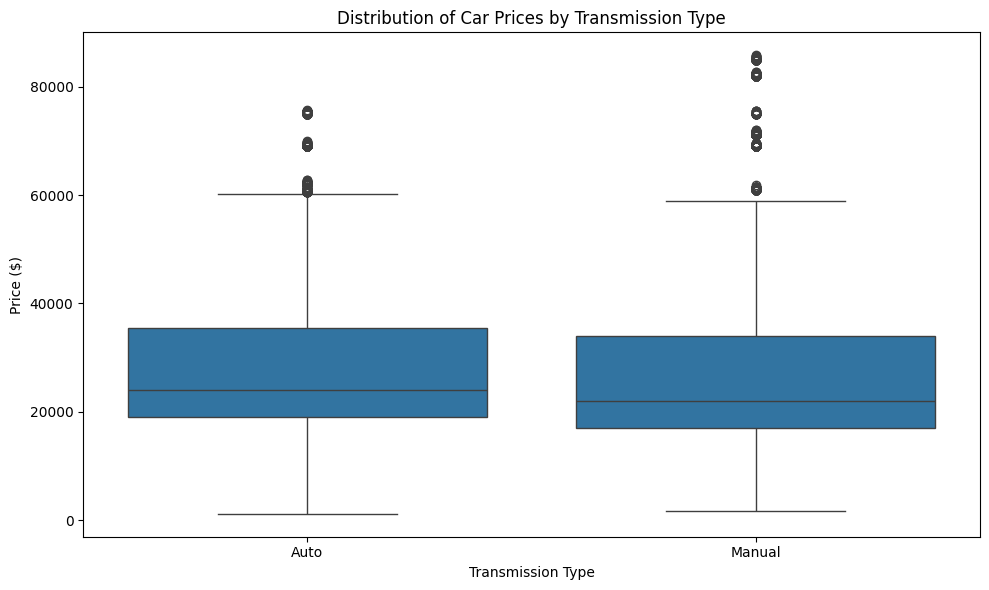

In [ ]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_df, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3268986431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)', palette='Spectral')


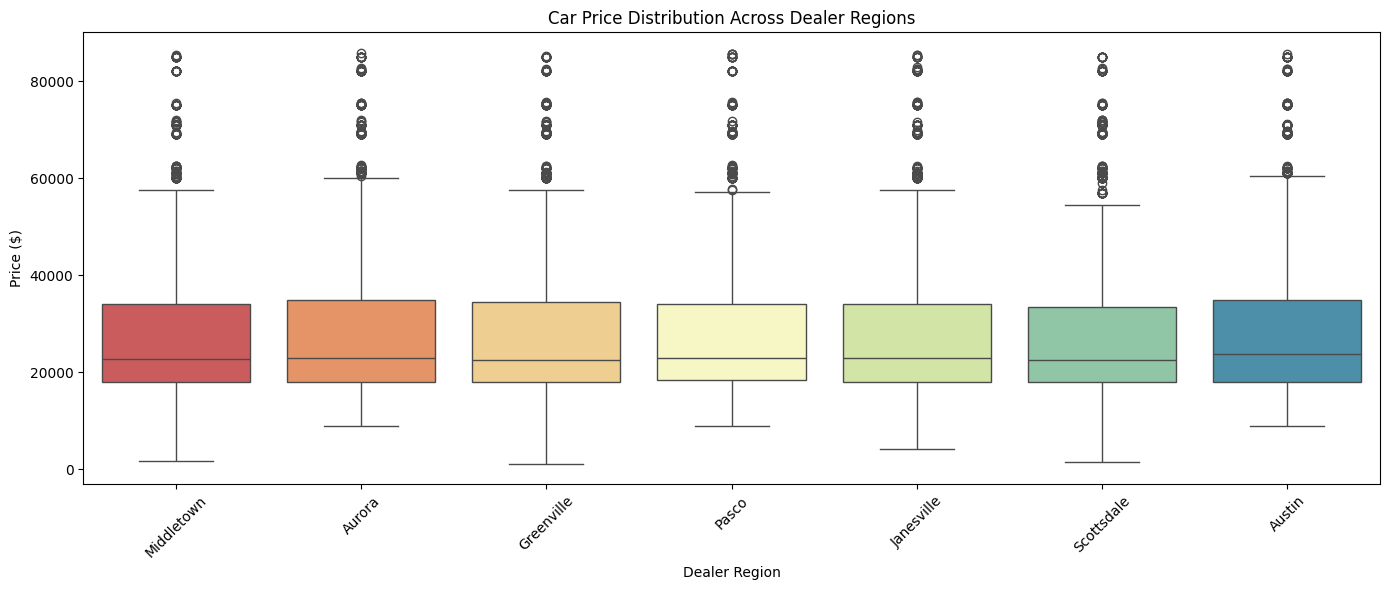

In [ ]:
#4. What is the distribution of car prices across different regions?
plt.figure(figsize=(14, 6))
sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)', palette='Spectral')
plt.title('Car Price Distribution Across Dealer Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1972270199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_df, y='Body Style', order=car_df['Body Style'].value_counts().index, palette='pastel')


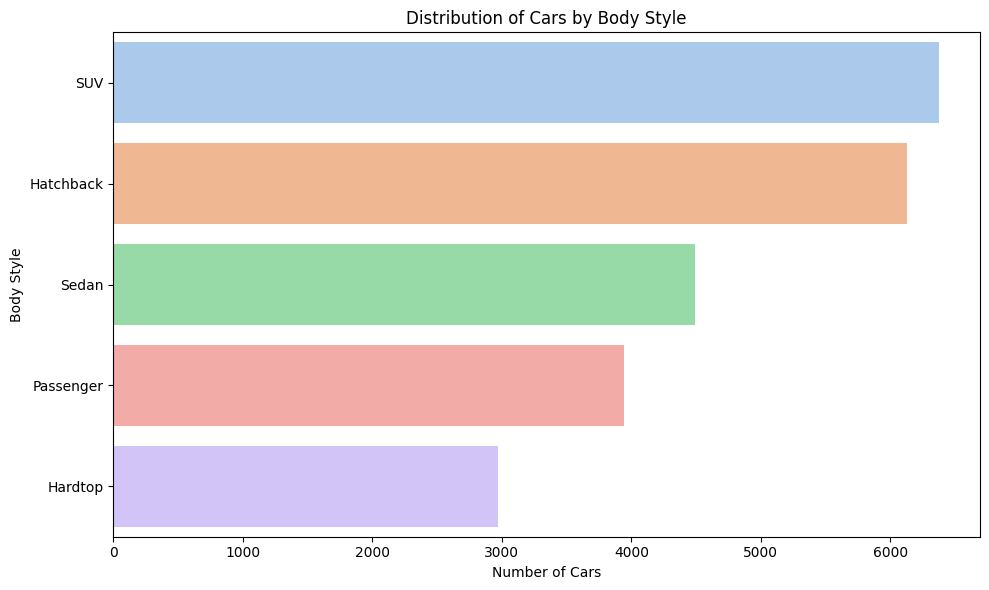

In [ ]:
#5. What is the distribution of cars based on body styles?
plt.figure(figsize=(10, 6))
sns.countplot(data=car_df, y='Body Style', order=car_df['Body Style'].value_counts().index, palette='pastel')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Number of Cars')
plt.ylabel('Body Style')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2578997368.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=car_df, x='Income Group', y='Price ($)', hue='Gender', ci=None, palette='Set2')


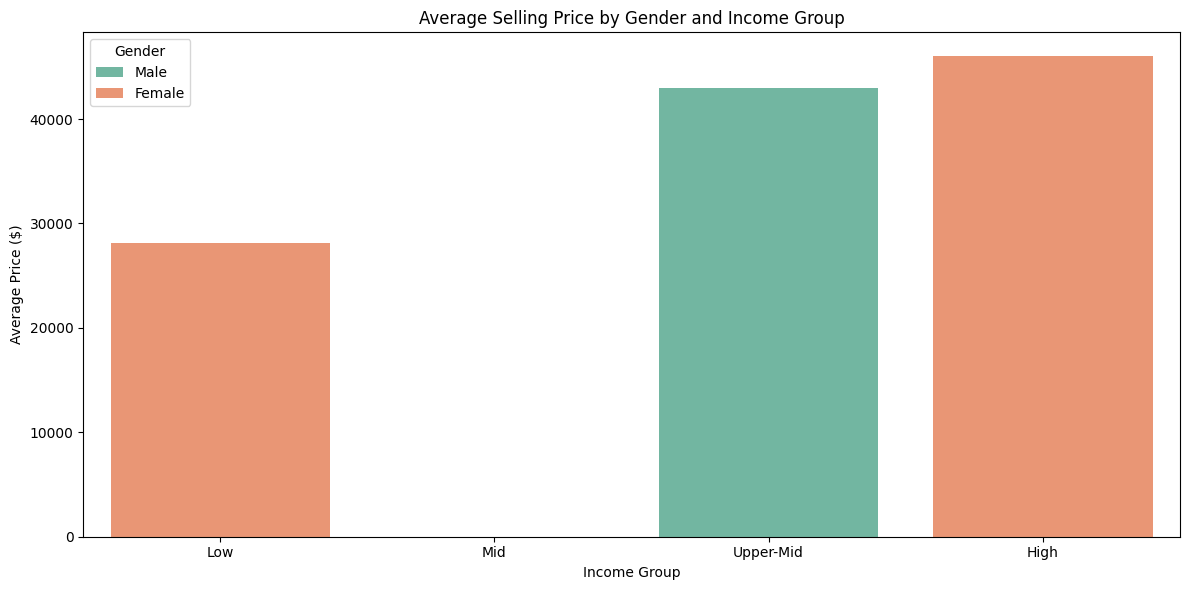

In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
car_df['Income Group'] = pd.cut(car_df['Annual Income'], bins=[0, 30000, 60000, 90000, 120000],
                                labels=['Low', 'Mid', 'Upper-Mid', 'High'])

plt.figure(figsize=(12, 6))
sns.barplot(data=car_df, x='Income Group', y='Price ($)', hue='Gender', ci=None, palette='Set2')
plt.title('Average Selling Price by Gender and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Price ($)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1821935114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)', palette='Set3')
/tmp/ipython-input-1821935114.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_df, x='Dealer_Region', palette='Set2', order=car_df['Dealer_Region'].value_counts().index)


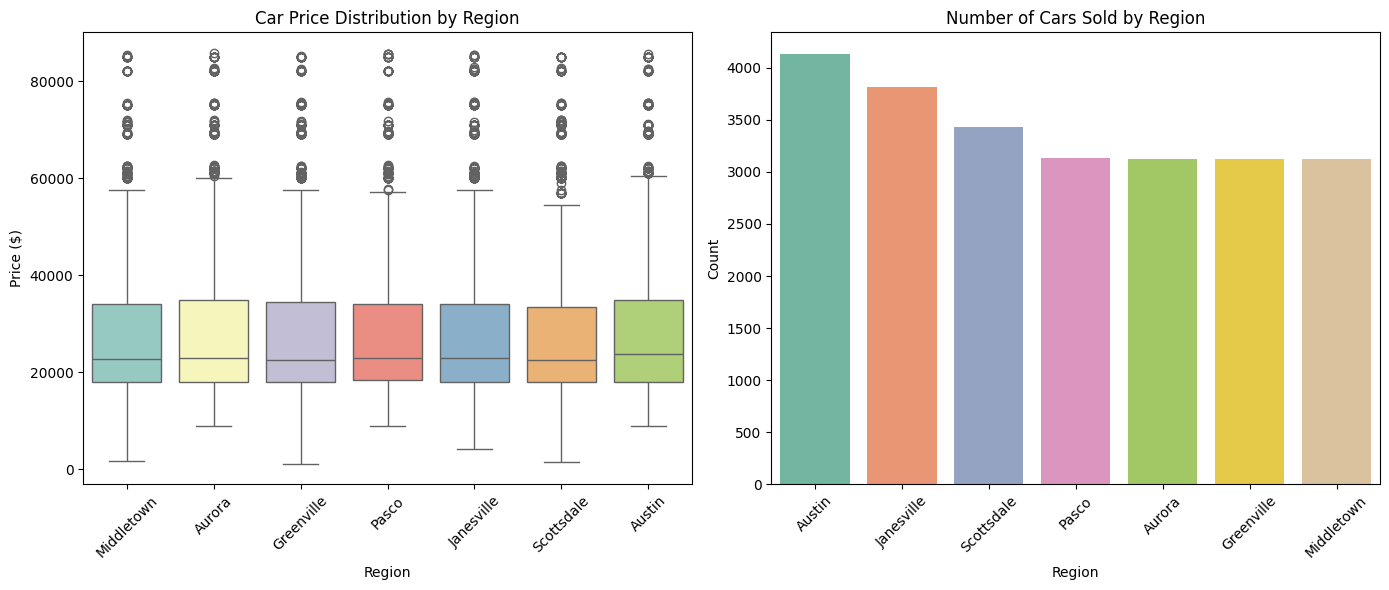

In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)', palette='Set3')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Region')
plt.ylabel('Price ($)')
plt.xlabel('Region')
plt.subplot(1, 2, 2)
sns.countplot(data=car_df, x='Dealer_Region', palette='Set2', order=car_df['Dealer_Region'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Cars Sold by Region')
plt.ylabel('Count')
plt.xlabel('Region')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3868502414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_avg_price.index, y=engine_avg_price.values, palette='coolwarm')


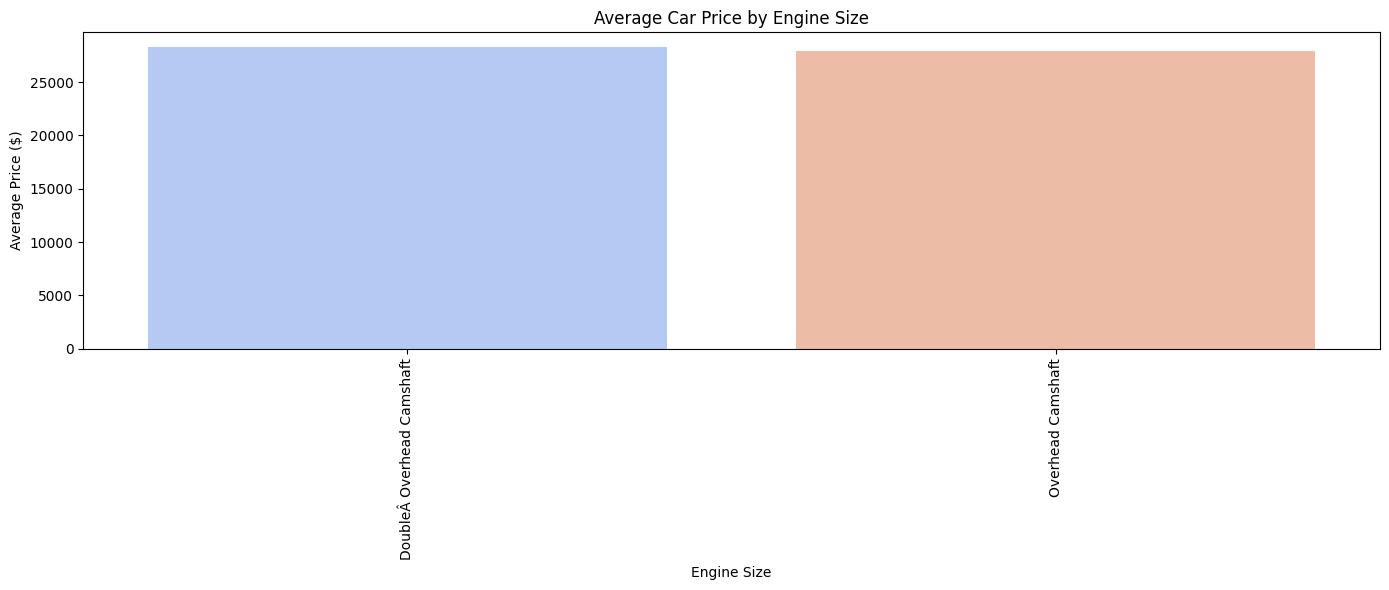

In [ ]:
#8. How does the average car price differ between cars with different engine sizes?
engine_avg_price = car_df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=engine_avg_price.index, y=engine_avg_price.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-947766367.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=car_df, x='Income Group', y='Price ($)', palette='viridis', ci=None)
/tmp/ipython-input-947766367.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=car_df, x='Income Group', y='Price ($)', palette='viridis', ci=None)


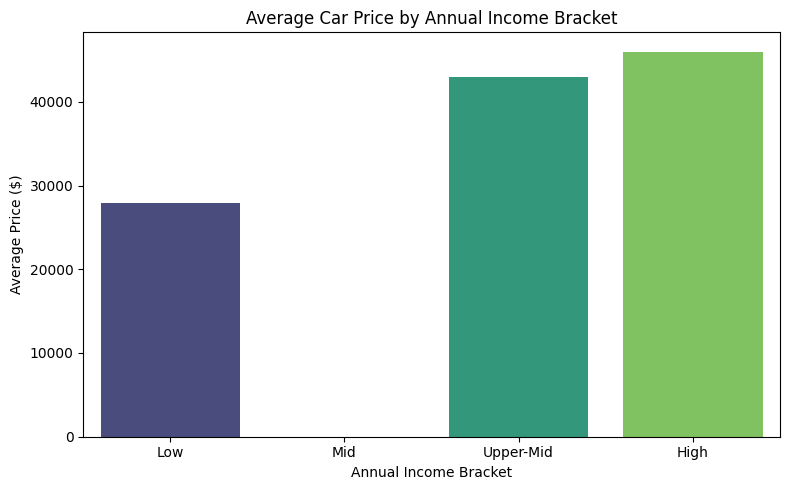

In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?
car_df['Income Group'] = pd.cut(car_df['Annual Income'],
                                bins=[0, 30000, 60000, 90000, 120000],
                                labels=['Low', 'Mid', 'Upper-Mid', 'High'])

plt.figure(figsize=(8, 5))
sns.barplot(data=car_df, x='Income Group', y='Price ($)', palette='viridis', ci=None)
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2626200362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_model_df, x='Model', y='Price ($)', palette='Set2')


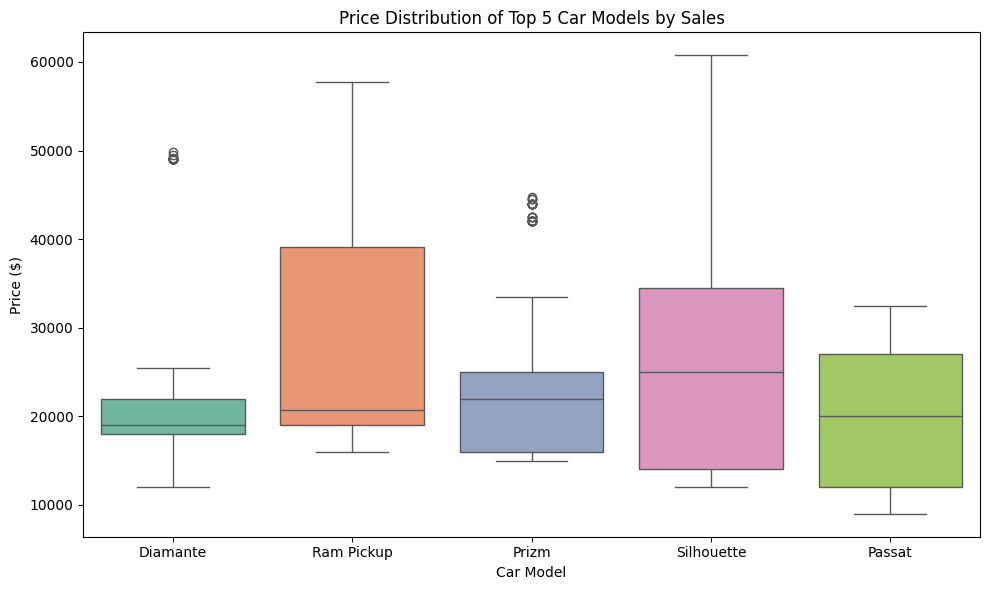

In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = car_df['Model'].value_counts().nlargest(5).index
top_model_df = car_df[car_df['Model'].isin(top_models)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_model_df, x='Model', y='Price ($)', palette='Set2')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.ylabel('Price ($)')
plt.xlabel('Car Model')
plt.tight_layout()
plt.show()

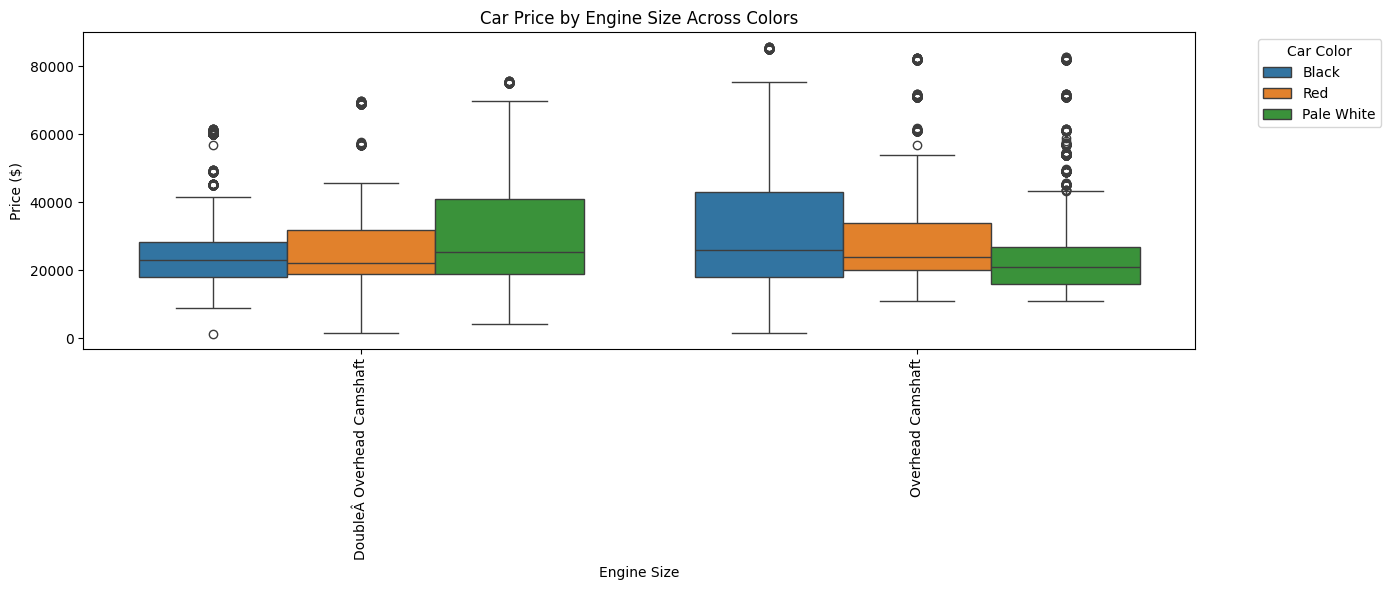

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.003889
Name: Price ($), dtype: float64


In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(14, 6))
sns.boxplot(data=car_df, x='Engine', y='Price ($)', hue='Color')
plt.title('Car Price by Engine Size Across Colors')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
color_price_variation = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print(color_price_variation.head())

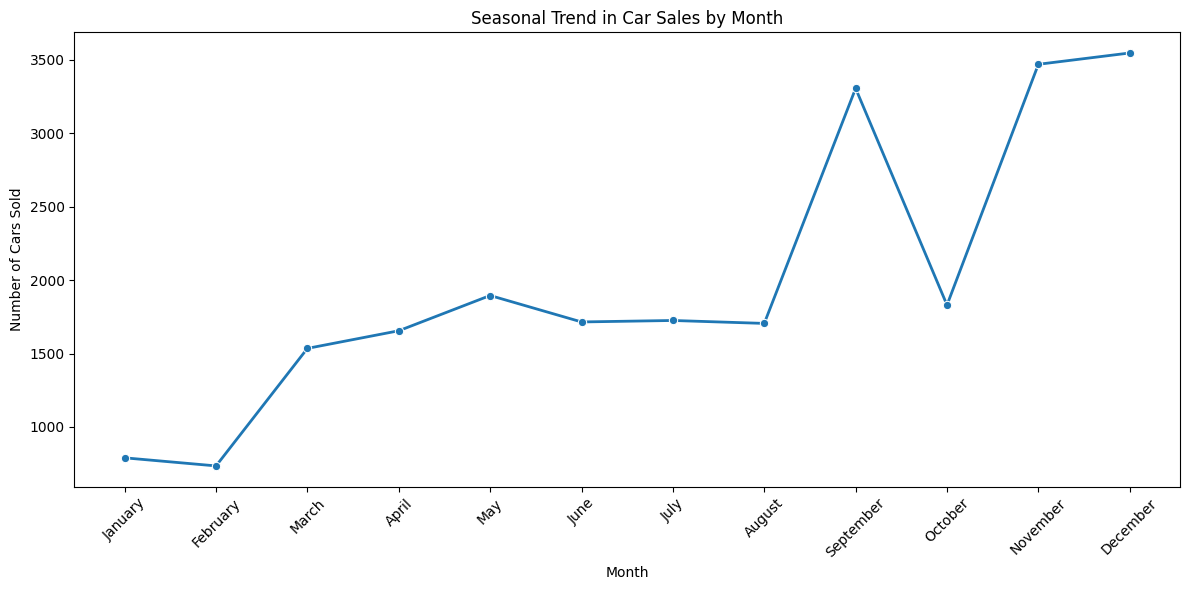

In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale?

car_df['Date'] = pd.to_datetime(car_df['Date'])
car_df['Sale_Month'] = car_df['Date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales = car_df['Sale_Month'].value_counts().reindex(month_order)

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=2)
plt.title('Seasonal Trend in Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3106763071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.catplot(


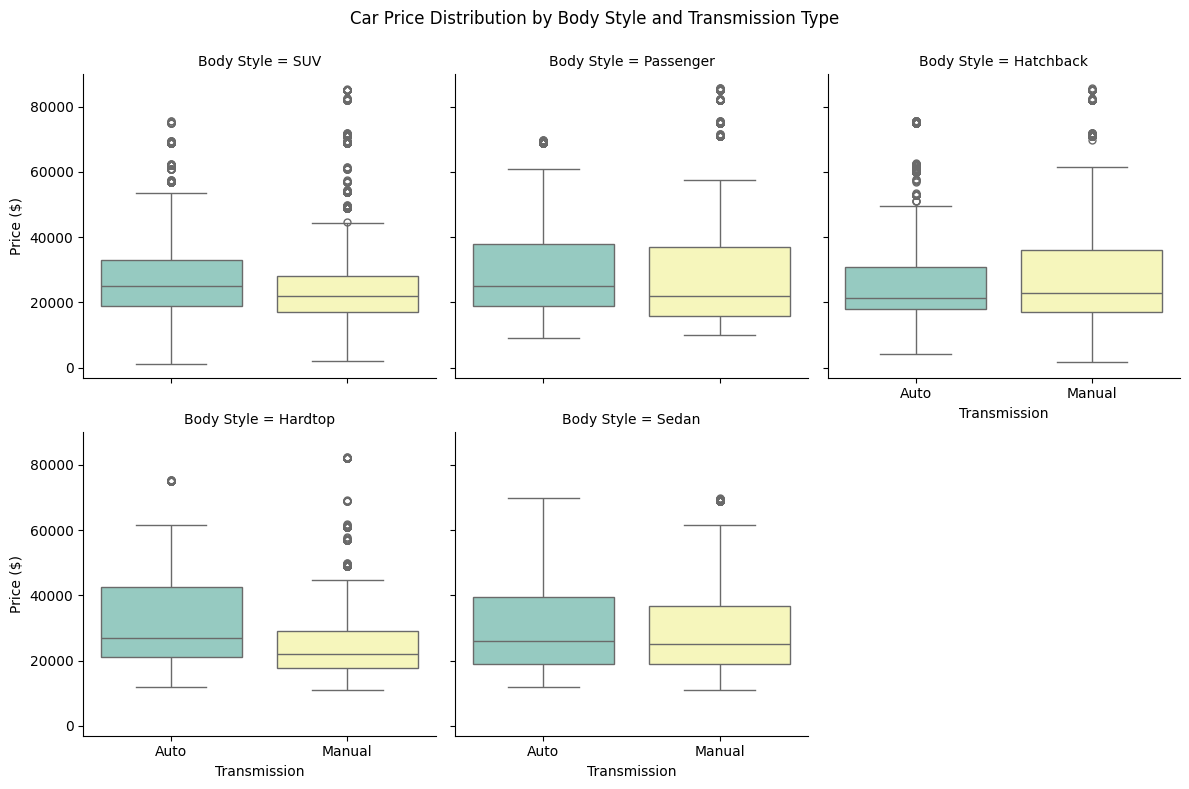

In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
b = sns.catplot(
    data=car_df, x="Transmission", y="Price ($)",
    col="Body Style", kind="box", col_wrap=3,
    height=4, aspect=1, palette="Set3"
)

b.fig.subplots_adjust(top=0.9)
b.fig.suptitle('Car Price Distribution by Body Style and Transmission Type')
plt.show()

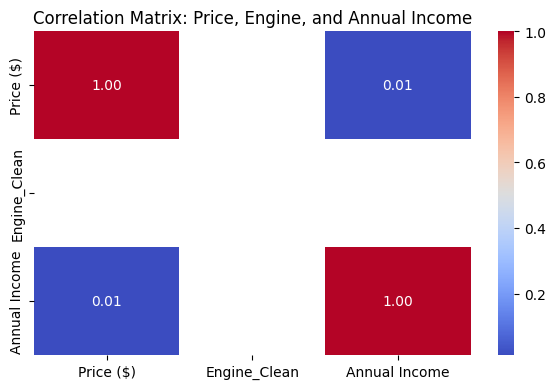

In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

corr_df = car_df[['Price ($)', 'Engine', 'Annual Income']]
car_df['Engine_Clean'] = car_df['Engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

corr_df = car_df[['Price ($)', 'Engine_Clean', 'Annual Income']]
correlation_matrix = corr_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Price, Engine, and Annual Income')
plt.tight_layout()
plt.show()


In [ ]:
#15. How does the average car price vary across different car models and engine types?
car_df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Group', 'Sale_Month', 'Engine_Clean'],
      dtype='object')

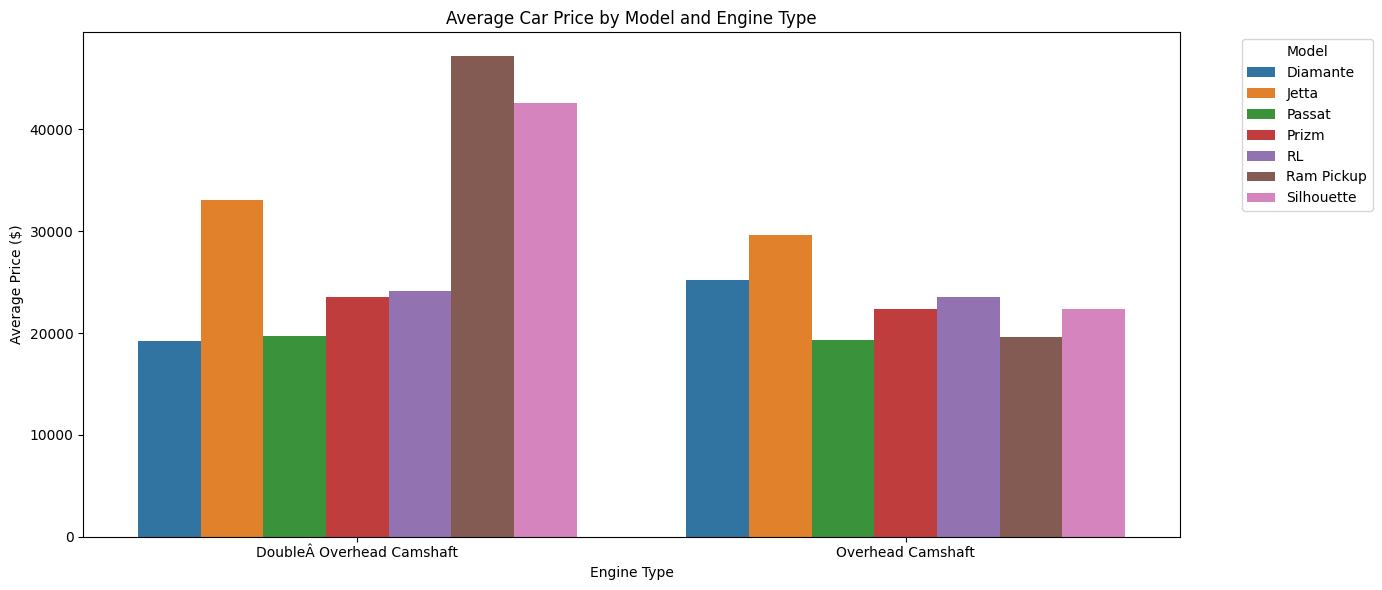

In [ ]:
filtered_df = car_df.dropna(subset=['Price ($)', 'Model', 'Engine'])
top_models = filtered_df['Model'].value_counts().nlargest(7).index
filtered_df = filtered_df[filtered_df['Model'].isin(top_models)]
avg_price = filtered_df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='Engine', y='Price ($)', hue='Model', palette='tab10')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Amazon Sales Data**

In [1]:


from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


amazon_df = pd.read_csv("/content/drive/MyDrive/PW_skills_Assignment/amazon.csv")
amazon_df.head(2)



,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [2]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [3]:
amazon_df.shape

(1465, 16)

In [4]:
amazon_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
#1. What is the average rating for each product category?
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')
avg_rating_by_category = amazon_df.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating_by_category = avg_rating_by_category.round(2)

print(avg_rating_by_category)



category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [7]:
#2. What are the top rating_count products by category?
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce')
df_filtered = amazon_df.dropna(subset=['rating_count', 'category'])
top_rated_by_category = df_filtered.sort_values(['category', 'rating_count'], ascending=[True, False])
top_products = top_rated_by_category.groupby('category').first().reset_index()
top_products[['category', 'product_name', 'rating_count', 'rating', 'actual_price']]


,category,product_name,rating_count,rating,actual_price
0,Computers&Accessories|Accessories&Peripherals|...,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,817.0,3.9,₹999
1,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0,4.3,"₹1,099"
2,Computers&Accessories|Accessories&Peripherals|...,Amazon Basics Magic Slate 8.5-inch LCD Writing...,401.0,4.1,₹999
3,Computers&Accessories|Accessories&Peripherals|...,STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...,491.0,4.2,₹999
4,Computers&Accessories|Accessories&Peripherals|...,HP 330 Wireless Black Keyboard and Mouse Set w...,427.0,3.9,"₹2,199"
...,...,...,...,...,...
78,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0,4.0,"₹2,499"
79,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,535.0,4.4,"₹19,990"
80,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,KENT POWP-Sediment Filter 10'' Thread WCAP,490.0,4.1,₹260
81,OfficeProducts|OfficePaperProducts|Paper|Copy&...,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,388.0,4.3,₹99


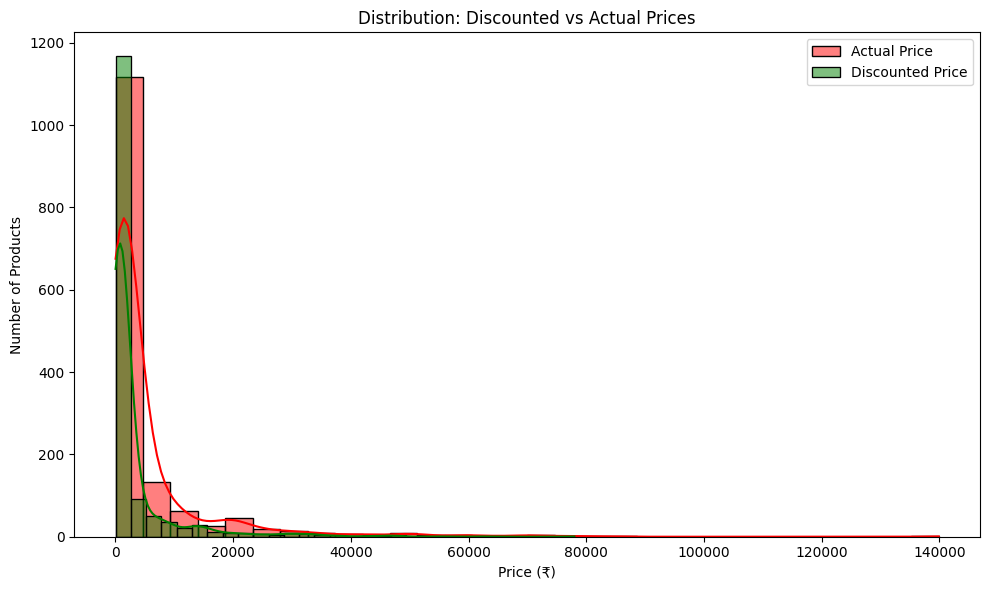

In [8]:
#3. What is the distribution of discounted prices vs. actual prices?
amazon_df['actual_price'] = amazon_df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_df['discounted_price'] = amazon_df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

plt.figure(figsize=(10, 6))

sns.histplot(amazon_df['actual_price'], color='red', label='Actual Price', kde=True, bins=30)
sns.histplot(amazon_df['discounted_price'], color='green', label='Discounted Price', kde=True, bins=30)

plt.title('Distribution: Discounted vs Actual Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Products')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#4. How does the average discount percentage vary across categories?
amazon_df['discount_percentage'] = amazon_df['discount_percentage'].apply(
    lambda x: str(x).replace('%', '') if isinstance(x, str) else x
)

amazon_df['discount_percentage'] = pd.to_numeric(amazon_df['discount_percentage'], errors='coerce')

avg_discount_by_category = amazon_df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False).round(2)
print(avg_discount_by_category)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                              0.0
OfficeP

In [10]:
#5. What are the most popular product names?
top_products = amazon_df[['product_name', 'rating_count']].dropna().sort_values(by='rating_count', ascending=False)
top_products_unique = top_products.drop_duplicates(subset='product_name')

top_10_products = top_products_unique.head(10)
print(top_10_products)


                                           product_name  rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
151   Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...         959.0
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...         942.0
214   Crypo™ Universal Remote Compatible with Tata S...         928.0
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...         925.0
147   Ambrane Fast 100W Output Cable with Type-C to ...         919.0


In [11]:
#6. What are the most popular product keywords?
product_names = amazon_df['product_name'].dropna().str.lower()
all_words = ' '.join(product_names).split()

stopwords = ['with', 'for', 'and', 'the', 'in', 'of', 'to', '-', '(', ')', '|']
filtered_words = [word for word in all_words if word not in stopwords and len(word) > 2]

word_counts = Counter(filtered_words)
top_keywords = word_counts.most_common(15)
keyword_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

print(keyword_df)


       Keyword  Frequency
0          usb        377
1        cable        320
2     charging        219
3         fast        211
4      (black)        187
5        smart        171
6         type        144
7   compatible        138
8         data        131
9          led        118
10    wireless        114
11       black        114
12      black)        112
13       water        104
14   bluetooth        100


In [12]:
#7. What are the most popular product reviews?
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce')
top_reviews = amazon_df.dropna(subset=['review_content', 'review_title']).sort_values(by='rating_count', ascending=False)
top_unique_reviews = top_reviews.drop_duplicates(subset='product_id')
top_unique_reviews[['product_name', 'rating_count', 'rating', 'review_title', 'review_content']].head(10)

,product_name,rating_count,rating,review_title,review_content
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0,NaN,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."
750,Eveready Red 1012 AAA Batteries - Pack of 10,989.0,4.3,"Nice .,very good batteries received,Longtevity...","Nive,very good batteries received,Like,Good pr..."
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976.0,3.7,"Kettle is good but bottle is not good quality,...","Bottle quality is not good.,Best for hot water..."
823,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0,4.3,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,974.0,4.3,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...
1272,Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...,959.0,3.9,"Ok,A good water heater,Easy to use inverter,Go...","Ok,The product works very well. The support is..."
1259,Hindware Atlantic Xceed 5L 3kW Instant Water H...,942.0,3.9,Good product but pipes/installation/plug not i...,I bought 5ltr 3kw model 10 days before Provide...
214,Crypo™ Universal Remote Compatible with Tata S...,928.0,3.8,"Good compatibility,Good Product,Good nice serv...",The remote works well and is pleasantly compat...
1262,iBELL Castor CTEK15L Premium 1.5 Litre Stainle...,925.0,4.1,"It’s a good product in this price.,Nice produc...",It’s a good product and I’m using it since 1 w...
147,Ambrane Fast 100W Output Cable with Type-C to ...,919.0,4.2,"Durable,Good Product,Okay 👌,So far so good,An ...","The cable does support fast PD charging, I hav..."


In [13]:
#8. What is the correlation between discounted_price and rating?

amazon_df['discounted_price'] = amazon_df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
amazon_df['discounted_price'] = pd.to_numeric(amazon_df['discounted_price'], errors='coerce')
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

filtered_df = amazon_df.dropna(subset=['discounted_price', 'rating'])
correlation = filtered_df['discounted_price'].corr(filtered_df['rating'])

print(f"Correlation between discounted_price and rating: {correlation:.2f}")

Correlation between discounted_price and rating: 0.12


In [14]:
#9. What are the Top 5 categories based on the highest rating?
category_rating = amazon_df.groupby('category')['rating'].mean()
top_5_categories = category_rating.sort_values(ascending=False).head(5)

print(top_5_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis.


* Weak Correlation (0.12) Between Price and Rating This low correlation suggests price isn’t strongly influencing customer ratings. Action: Investigate other factors affecting rating—like product features, reviews, or brand reputation—to improve customer satisfaction.

* Category Performance Insights Analyze the Top 5 categories by rating and compare them with sales or volume data. Action: Focus marketing or inventory efforts on high-rating categories to boost revenue. Conversely, identify low-rating categories for product improvement or removal.

* Pricing Strategy Optimization Since discounted price doesn’t strongly affect rating, check if your discount offers are effective in driving sales or customer loyalty. Action: Experiment with dynamic pricing or personalized discounts based on customer segments.

* Data Cleaning & Consistency You had to clean price data (remove ₹, commas). Action: Automate data cleaning processes for consistency and reduce errors in analysis.

* Customer Feedback Analysis Look beyond numeric ratings and analyze text reviews (if available) to find product-specific pain points or desired features. Action: Use this feedback to guide product development or customer support improvements.

* Rating Distribution Check Averages hide distribution details. Action: Check rating spread (variance) per category to understand if ratings are consistently good or if there’s a mix of very low and very high scores.

# **Spotify Data: Popular Hip-hop Artists and Tracks**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [17]:
data = pd.read_csv("/content/drive/MyDrive/PW_skills_Assignment/spotify.csv")
data.head(2)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0


In [18]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
data.shape

(440, 5)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [20]:
data.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [22]:
data.Artist.unique()

array(['Drake', 'Travis Scott', 'Post Malone', 'Noah Kahan',
       'Nicki Minaj', 'Justin Bieber', 'Jessie J', 'KAROL G', '21 Savage',
       'Metro Boomin', 'SZA', 'Jack Harlow', 'Jung Kook', 'Lil Nas X',
       'Lyrical Lemonade', 'Future', 'Don Toliver', 'Lil Wayne', 'Yeat',
       'Eminem', 'Kendrick Lamar', 'Baby Keem', 'The Weeknd', 'JAY-Z',
       'Cardi B', 'Bruno Mars', 'Ed Sheeran', 'GloRilla', 'Gunna',
       'Lil Baby', 'Internet Money', 'Sarz', 'J. Cole', 'Lil Durk',
       'cassö', 'D-Block Europe', 'Clavish', 'Latto', 'Young Nudy',
       'Megan Thee Stallion', 'NEIKED', 'Snoop Dogg', 'Dr. Dre',
       'benny blanco', 'Young Thug', 'Chris Brown', 'Dave', 'Central Cee',
       'The Kid LAROI', 'Quevedo', 'Bizarrap', 'Anuel AA', 'SAIKO',
       'David Guetta', 'Coi Leray', 'Pressa', 'Fivio Foreign', 'RAYE',
       'French Montana', 'Arizona Zervas', 'Pharrell Williams',
       'XXXTENTACION', 'Kane Brown', 'Ellie Goulding', 'Reneé Rapp',
       'Maroon 5', 'DJ Snake', 'Qu

In [23]:
data.duplicated().sum()

np.int64(27)

In [24]:
data = data.drop_duplicates()

In [25]:
np.int64(0)

np.int64(0)

In [26]:
data.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [27]:
#2. What is the distribution of popularity among the tracks in the dataset?Visualize it using a histogram?
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


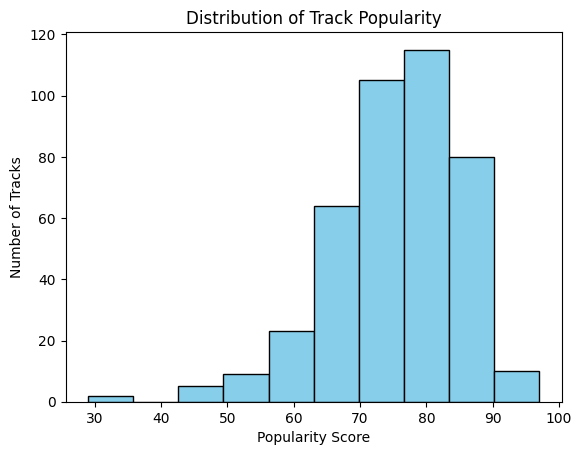

In [28]:
plt.hist(data["Popularity"], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')

# Show plot
plt.show()

In [31]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [34]:
data.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

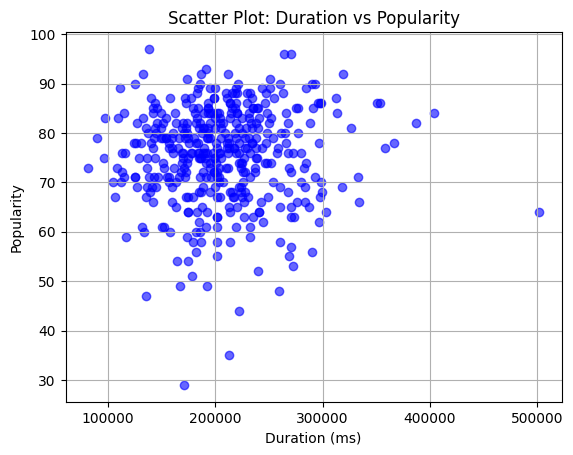

In [35]:
plt.scatter(data["Duration (ms)"], data["Popularity"], color='blue', alpha=0.6)

plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Duration vs Popularity')

plt.grid(True)
plt.show()



In [36]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
data.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [38]:
data.Artist

,Artist
0,Drake
1,Drake
2,Drake
3,Drake
4,Drake
...,...
433,French Montana
434,Jason Derulo
436,Fat Joe
437,A$AP Ferg


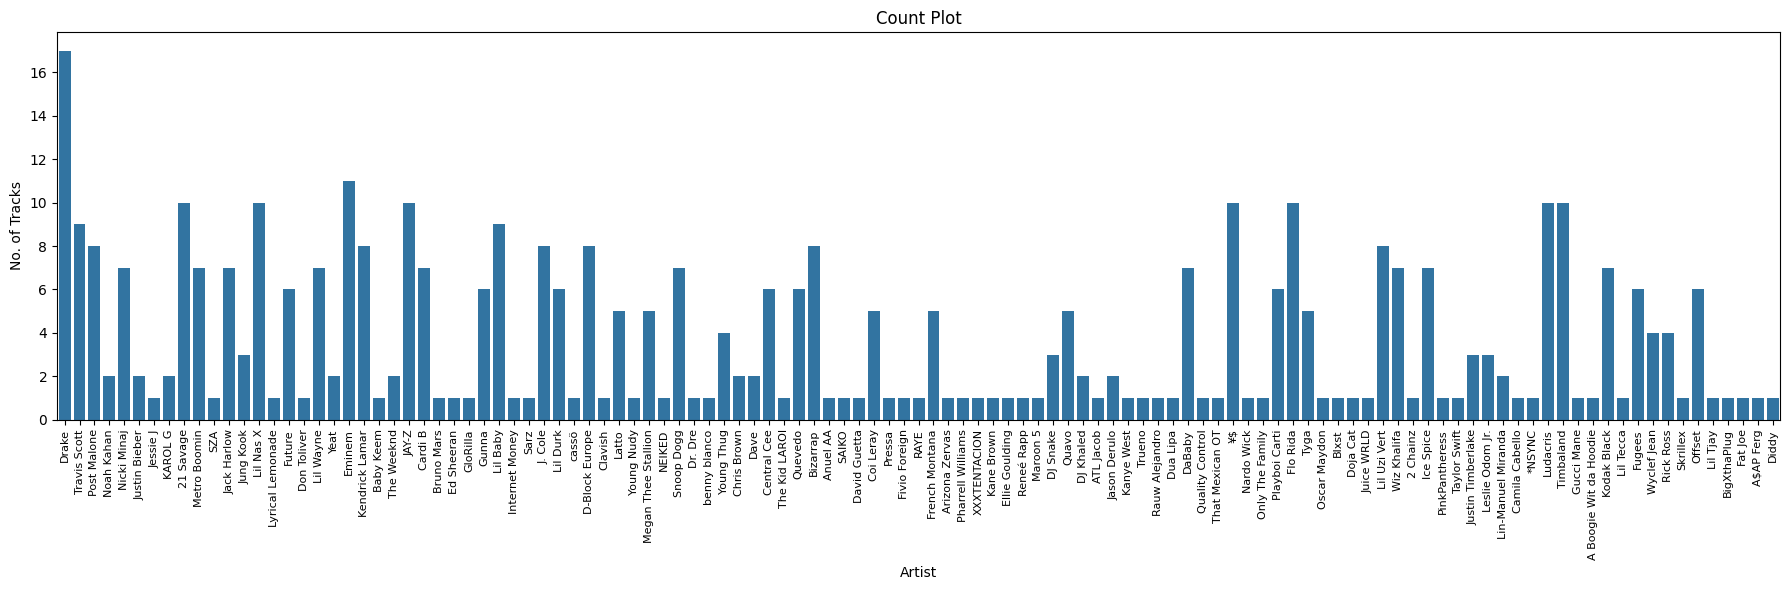

In [40]:
plt.figure(figsize=(18, 6))

# Create count plot
sns.countplot(data=data, x='Artist')

# Add labels and title
plt.xlabel('Artist')
plt.ylabel('No. of Tracks')
plt.title('Count Plot')

plt.xticks(rotation=90, fontsize= 8)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [41]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
data.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [43]:
data.Popularity.unique()

array([92, 91, 90, 88, 87, 86, 85, 84, 83, 68, 63, 77, 81, 73, 71, 79, 93,
       89, 97, 78, 80, 66, 72, 82, 75, 69, 65, 74, 96, 76, 67, 70, 60, 56,
       61, 58, 59, 51, 29, 55, 54, 64, 47, 35, 62, 53, 52, 48, 57, 44, 49])

In [44]:
data.Popularity.min()

29

In [45]:
data.Popularity.max()

97

In [46]:
top_5_unique = data.sort_values(by='Popularity').head(5)

top_5_unique[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [47]:
data.duplicated().sum()

np.int64(0)

In [48]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_5_unique = data.sort_values(by='Popularity',ascending=False).head(5)

top_5_unique[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
40,Jack Harlow,Lovin On Me,97
260,¥$,CARNIVAL,96
70,21 Savage,redrum,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92


In [49]:
artist_avg_popularity = data.groupby('Artist')['Popularity'].mean()

artist_avg_popularity_sorted = artist_avg_popularity.sort_values(ascending=False)
top_artist = artist_avg_popularity_sorted.head(5)

print(top_artist)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [50]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
top_5_unique = data.sort_values(by='Popularity', ascending=False).head(5)
top_5_unique[['Artist', 'Track Name']]

,Artist,Track Name
40,Jack Harlow,Lovin On Me
260,¥$,CARNIVAL
70,21 Savage,redrum
30,Travis Scott,FE!N (feat. Playboi Carti)
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA)


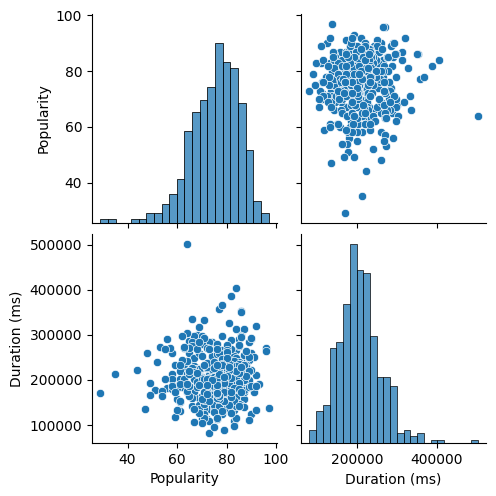

In [51]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(data=data)
plt.show()

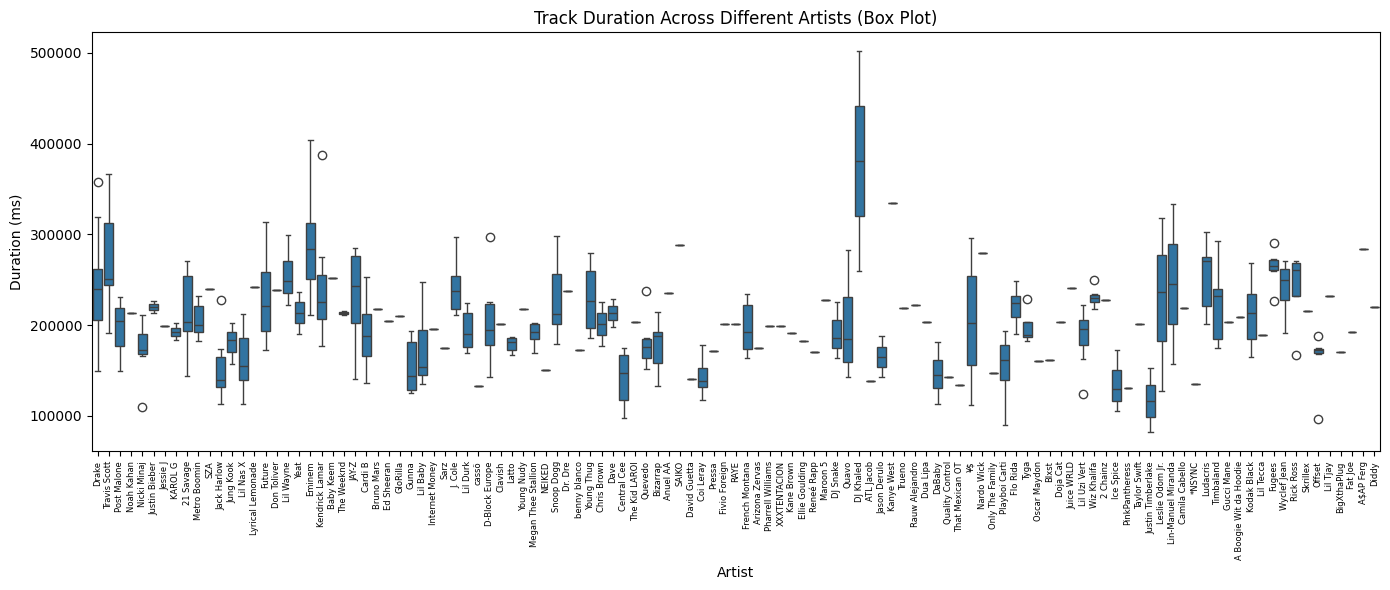

In [52]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='Artist', y='Duration (ms)')

plt.title("Track Duration Across Different Artists (Box Plot)")
plt.xticks(rotation=90, fontsize= 6)
plt.tight_layout()
plt.show()

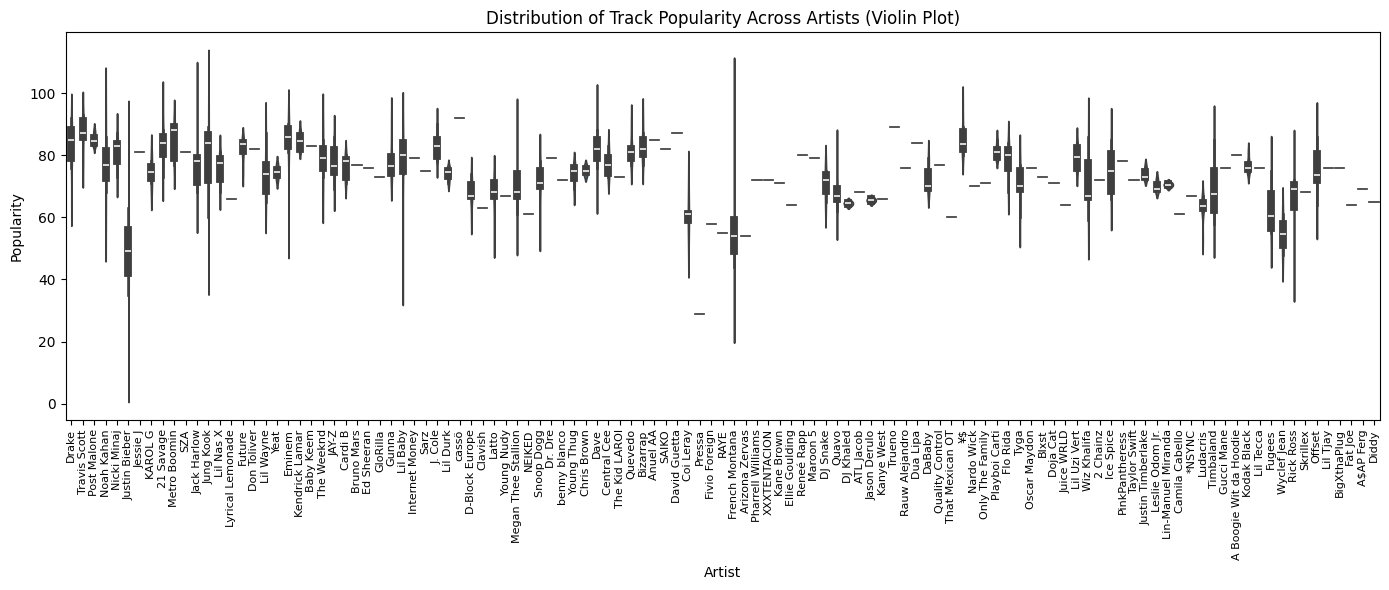

In [53]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(14, 6))
sns.violinplot(data=data, x='Artist', y='Popularity')

plt.title("Distribution of Track Popularity Across Artists (Violin Plot)")
plt.xticks(rotation=90, fontsize= 8)
plt.tight_layout()
plt.show()

In [54]:
# Insights: Distribution of Track Popularity Across Artists (Violin Plot)

# 1. Popularity varies across artists.
# 2. Some artists have consistently high popularity (e.g., Drake, Travis Scott).
# 3. Others show wide variation, indicating mixed track performance.
# 4. Some artists have tightly packed scores, showing consistent popularity.
# 5. Outliers suggest a few standout or underperforming tracks.